# CS 210 Recitation 3

**Please install Anaconda Python an make sure you can start your Jupyter Notebook, see the documentation below:**

### https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/

Now let us get started with our content for Recitation 3.
We can add modules to our notebook by import command, let's __import *NumPy*__!

**NumPy** is the fundamental package for data analysis. It contains::

+ a powerful N-dimensional array object
+ sophisticated numerical functions for linear algebra
+ most importantly, it is an interface for fast Fortran and C code

Importing modules is easy, just *import module_name* 

But, sometimes we use that module a lot, so we may give it a shorter name; 

**import numpy as np** , gives numpy the module the name np...


In [1]:
import numpy as np

Let's test numpy vs python performance;
A simple benchmark could be array sum

In [2]:
x = np.array(range(1000000),dtype=np.float32) # a NumPy array holding 1 million numbers
l = list(range(1000000))   # an ordinary Python list holding 1 million numbers

def sum_array(x):
    total = 0
    for i in x:
        total = i + total
    return total

print("Size of x:",x.size,", and type of elements of x:",x.dtype)
print("Length of list l:", len(l))


Size of x: 1000000 , and type of elements of x: float32
Length of list l: 1000000


In [3]:
type(x), len(x)

(numpy.ndarray, 1000000)

In [4]:
y=list(x)
y[5555]

5555.0

In [5]:
y.remove(5555.0)
y[5555]

5556.0

In [6]:
len(y)

999999

In [7]:
z=np.array(y)
type(z)

numpy.ndarray

In [8]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
li =[[1,2,3],[4,5,6],[7,8,9]]

In [9]:
arr[2:,1:]

array([[8, 9]])

In [10]:
li[2:][0][1:]

[8, 9]

In [11]:
arr_flat = arr.flatten()
arr_flat

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
arr_flat[arr[1]]   # indices could be a list as well as a ndarray

array([5, 6, 7])

In [13]:
arr_flat < 5

array([ True,  True,  True,  True, False, False, False, False, False], dtype=bool)

In [14]:
arr_flat[arr_flat < 5]   # takes only the elements for which the index is True

array([1, 2, 3, 4])

In [15]:
arr2 = np.square(arr_flat)
arr2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [16]:
arr2[arr_flat < 5]

array([ 1,  4,  9, 16])

In [17]:
index = arr_flat < 5
arr3 = arr2[index]
arr3

array([ 1,  4,  9, 16])

In [18]:
arr3[0] = 10
arr3


array([10,  4,  9, 16])

In [19]:
arr2  # indexed arrays are different objects from the array they are derived from

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [20]:
arr4 = arr2[-3:]
arr4

array([49, 64, 81])

In [21]:
arr4[0] = 50
arr4

array([50, 64, 81])

In [22]:
arr2  # slices point to the same underlying array since they are just views

array([ 1,  4,  9, 16, 25, 36, 50, 64, 81])

In [23]:
# Let us time the summation operation in three different ways
nptime = %timeit -o x.sum()
pytime_loop = %timeit -o  sum_array(l)
pytime_builtin_sum = %timeit -o  sum(l)
print()
print("NumPy calculation took",nptime.best*1000, "milliseconds.")
print("Python for loop summation took",pytime_loop.best*1000, "milliseconds.")
print("Python sum() function took",pytime_builtin_sum.best*1000, "milliseconds.")
print()
print("NumPy is",pytime_loop.best/nptime.best, "times faster than summing in the for loop,")
print("   and",pytime_builtin_sum.best/nptime.best,"times faster than calling sum().")

1000 loops, best of 3: 442 µs per loop
10 loops, best of 3: 48.1 ms per loop
100 loops, best of 3: 8.9 ms per loop

NumPy calculation took 0.4419504840002446 milliseconds.
Python for loop summation took 48.132577700016554 milliseconds.
Python sum() function took 8.899004669997339 milliseconds.

NumPy is 108.90943542894709 times faster than summing in the for loop,
   and 20.135750479215254 times faster than calling sum().


If you are familar with Matlab, to allocate matrixes with zeros and ones there are functions for it. We have the same thing in NumPy as well. 

In [24]:
print('Zeros matrix (2 by 3):')   # a matrix is like a table of numbers
print(np.zeros((2,3)))   # (2,3) is a tuple, 2 is nr.of rows, 3 is nr.of columns
print('Ones matrix (3 by 2):') # 2-D array structure is similar to a list of lists
print(np.ones((3,2)))
print('Identity matrix (3 by 3):')
I = np.eye(3)
print(I)  # np.eye(3,3) works as well but no need, why?

Zeros matrix (2 by 3):
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
Ones matrix (3 by 2):
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
Identity matrix (3 by 3):
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


We can generate random arrays/matrices as well!

In [25]:
x = np.random.normal(size=100000)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

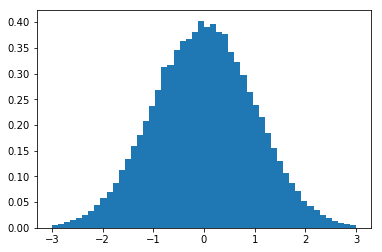

In [27]:
plt.hist(x,normed=True,bins=np.linspace(-3,3,51));

In [28]:
x = np.random.gamma(2,3,100000)

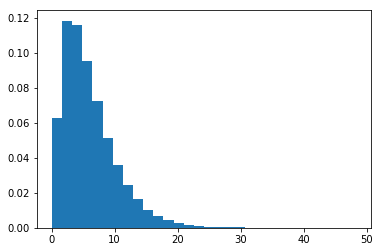

In [29]:
plt.hist(x, bins=30,normed=True);

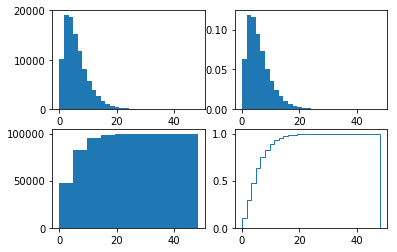

In [30]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(x,bins=30)
plt.subplot(2,2,2)
plt.hist(x,bins=30, normed=True)
plt.subplot(2,2,3)
plt.hist(x,cumulative=30)
plt.subplot(2,2,4)
plt.hist(x,bins=30,normed=True,cumulative=True,histtype="step");


In [31]:
print(np.random.random((3,4)))

[[ 0.7107718   0.52458652  0.22294762  0.87933387]
 [ 0.21136248  0.17114878  0.63356291  0.89875838]
 [ 0.41226808  0.72937745  0.85772279  0.64556261]]


Hmm... np.random.random is rather verbose.
instead of whole module, you can just import random function.

In [32]:
from numpy.random import random
print(random((3,4)))

[[ 0.84233616  0.6619666   0.92796831  0.15631255]
 [ 0.31146023  0.58261084  0.09993322  0.89224374]
 [ 0.82000798  0.30481399  0.09314182  0.04296068]]


We can access matrices elements with special syntax

In [33]:
A = random((5,3))
print('Matrix A:')
print(A)
print('The first element of A:')
print(A[0,0])
print('A[3,1]:')
print(A[3,1])


Matrix A:
[[ 0.80696297  0.62252347  0.59794735]
 [ 0.52988239  0.00470842  0.02010188]
 [ 0.63032778  0.63195314  0.79042369]
 [ 0.50262659  0.69204995  0.30056   ]
 [ 0.19674512  0.76636293  0.13467352]]
The first element of A:
0.806962971195
A[3,1]:
0.692049952789


NumPy has a range function too

In [34]:
r = np.arange(10,20)
print(r)

[10 11 12 13 14 15 16 17 18 19]


In [35]:
s = np.linspace(0,100,5)
s

array([   0.,   25.,   50.,   75.,  100.])

In [36]:
np.logspace(0,5,6,base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.])

We can resize any numpy array to different shape.
Since, values are stored in memory consequtively in a flat vector, resulting matrix looks like following;

In [37]:
r.resize((2,5))
print('Shape (2,5)')
print(r)
print('Shape (5,2)')
r.resize((5,2))
print(r)

Shape (2,5)
[[10 11 12 13 14]
 [15 16 17 18 19]]
Shape (5,2)
[[10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]


In [38]:
r

array([[10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

NumPy arrays have special slicing scheme similar to Matlab

In [39]:
M = np.arange(0,20)
M.resize((4,5))
print('Matrix M:')
print(M)
print('The first two rows of M:')
print(M[0:2,:3])
print('Columns 1 and 3 of M:')
print(M[:,[1,3]])
print('Say if each elements is bigger than 5:')
print(M>5)
print('Select elements bigger than 5 and filter out the rest:')
print(M[M>5])   

Matrix M:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
The first two rows of M:
[[0 1 2]
 [5 6 7]]
Columns 1 and 3 of M:
[[ 1  3]
 [ 6  8]
 [11 13]
 [16 18]]
Say if each elements is bigger than 5:
[[False False False False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
Select elements bigger than 5 and filter out the rest:
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [40]:
M[M>10]   # why has the shape changed?

array([11, 12, 13, 14, 15, 16, 17, 18, 19])

In [41]:
np.any(M>18), np.any(M>19), np.all(M<20)

(True, False, True)

In [42]:
M<20

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

Numpy provides functions for numerical operations as well.

In [43]:
M = np.array([[0,1,2,3,4],[1,2,3,4,5]])
print('Matrix M:')
print(M)
print("Shape of M:", M.shape)
print('Mean of all elements of M:')
print(M.mean())   # equivalent to np.mean(M)
print('Median of all elements of M:')
print(np.median(M))
print('Square of all elements of M:')
print((M**2))
print('Sum of squares of all elements of M:')
print(np.sum(M**2))
print('Sum of all elements of in M:')
print(M.sum())
print('Sum on axis 0:')  # returns in the shape of a row of M
print(np.sum(M, axis=0)) # Python has named parameters for functions
print('Sum on axis 1:')  # returns in the shape of a rcolumn of M
print(np.sum(M, axis=1))


Matrix M:
[[0 1 2 3 4]
 [1 2 3 4 5]]
Shape of M: (2, 5)
Mean of all elements of M:
2.5
Median of all elements of M:
2.5
Square of all elements of M:
[[ 0  1  4  9 16]
 [ 1  4  9 16 25]]
Sum of squares of all elements of M:
85
Sum of all elements of in M:
25
Sum on axis 0:
[1 3 5 7 9]
Sum on axis 1:
[10 15]


In [44]:
N = random(M.shape) # random matrix in shape of matrix m
print('Matrix N:')
print(N)
print('Elementwise multiplication of M with N')
print(N*M)
print('Matrix multiplication of M\n',M,"\nwith N.T\n",N.T,"\nis:")
P=M.dot(N.T)
print(P)

Matrix N:
[[ 0.09134744  0.27394765  0.51391231  0.41407784  0.87190585]
 [ 0.72317385  0.52942086  0.2391846   0.72150653  0.76286945]]
Elementwise multiplication of M with N
[[ 0.          0.27394765  1.02782462  1.24223353  3.4876234 ]
 [ 0.72317385  1.05884173  0.71755379  2.88602613  3.81434726]]
Matrix multiplication of M
 [[0 1 2 3 4]
 [1 2 3 4 5]] 
with N.T
 [[ 0.09134744  0.72317385]
 [ 0.27394765  0.52942086]
 [ 0.51391231  0.2391846 ]
 [ 0.41407784  0.72150653]
 [ 0.87190585  0.76286945]] 
is:
[[ 6.0316292   6.22378746]
 [ 8.19682029  9.19994276]]


In [45]:
m = np.random.random((3,3)) # elements are in 0 to 1
m -= 0.5  # now elements are in range -0.5 to 0.5
print('A matrix with some negative values:')
print(m)
m[m<0] = 0
print('The rectified matrix:')
print(m)

A matrix with some negative values:
[[ 0.01444725  0.26776149 -0.39000939]
 [ 0.24932368 -0.26060796  0.12061331]
 [ 0.05251112 -0.36287843 -0.05561347]]
The rectified matrix:
[[ 0.01444725  0.26776149  0.        ]
 [ 0.24932368  0.          0.12061331]
 [ 0.05251112  0.          0.        ]]


*Let's get to work with some real data!*

**Kaggle has data for Titanic survivors, in CSV format.**

It looks like this;

*PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked*
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S

Parsing and converting data types to proper ones would be tedious.

Instead we shall employ the Pandas library to help with our data manipulations. 

Note: Python has its own csv reader. But, Pandas gives a much better interface.

### https://www.kaggle.com/c/titanic

## VARIABLE DESCRIPTIONS:
**survival**        Survival (0 = No; 1 = Yes)

**pclass**          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**name**            Name

**sex**             Sex

**age**             Age

**sibsp**           Number of Siblings/Spouses Aboard

**parch**           Number of Parents/Children Aboard

**ticket**          Ticket Number

**fare**            Passenger Fare

**cabin**           Cabin

**embarked**        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Special Notes:

**Pclass** is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

**Age** is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

**Sibling**:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

**Spouse**:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

**Parent**:   Mother or Father of Passenger Aboard Titanic

**Child**:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic


In [46]:
import pandas as pd

In [47]:
data = pd.read_csv('https://rawgit.com/ggokturk/CS210/master/titanic_train.csv',index_col=['PassengerId'])

Pandas uses dataframes to manipulate datasets. read_csv function reads a csv file (on your computer or in the internet) and creates an dataframe.  index_col parameter used for indexing the dataframe.
To see what's inside of large datasets, you can use head and tail functions of the dataframe.

In [48]:
data.head(3) #first 3 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [49]:
data.tail(3) #last 3 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
data.Age[:10] # data.Age is a pandas series, which has an underlying numpy array, could have used .head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [51]:
data.Survived.mean()

0.3838383838383838

In [52]:
data[data.Survived==0].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [53]:
np.nanmean(data[data.Survived==0].Age)  # Compute the arithmetic mean along the specified axis, ignoring NaNs

30.626179245283019

In [54]:
data.Age.isnull().sum()

177

In [55]:
data.Age.count()

714

In [56]:
len(data)

891

In [57]:
np.nanmean(data[data.Survived==0].Age)

30.626179245283019

In [58]:
data[data.Sex=='male'].Survived.mean()

0.18890814558058924

In [59]:
data[data.Sex=='female'].Survived.mean()

0.7420382165605095

In [62]:
data[["Name","Age"]][(data.Sex=='female') & (data.Survived==1)& (data.Age>50)]

,Name,Age
PassengerId,,
12,"Bonnell, Miss. Elizabeth",58.0
16,"Hewlett, Mrs. (Mary D Kingcome)",55.0
196,"Lurette, Miss. Elise",58.0
269,"Graham, Mrs. William Thompson (Edith Junkins)",58.0
276,"Andrews, Miss. Kornelia Theodosia",63.0
367,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0
484,"Turkula, Mrs. (Hedwig)",63.0
497,"Eustis, Miss. Elizabeth Mussey",54.0
514,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",54.0


In [61]:
data[["Name","Age"]][(data.Sex=='female') & (data.Survived==1)& (data.Age>50)].mean()

Age    56.4375
dtype: float64

In [63]:
data.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       NaN
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18      NaN
19     31.0
20      NaN
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27      NaN
28     19.0
29      NaN
30      NaN
       ... 
862    21.0
863    48.0
864     NaN
865    24.0
866    42.0
867    27.0
868    31.0
869     NaN
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879     NaN
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, dtype: float64

In [64]:
import matplotlib.pyplot as plt


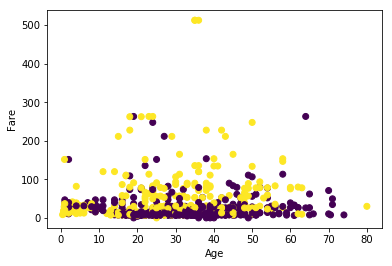

In [65]:
%matplotlib inline
plt.scatter(data.Age, data.Fare, c=data.Survived)
plt.xlabel('Age')
plt.ylabel('Fare');

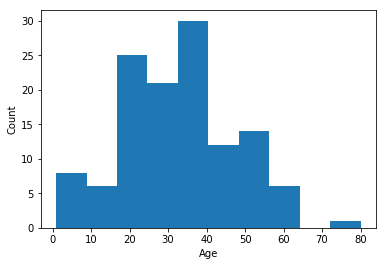

In [67]:
d = data.dropna()
plt.hist(d[d.Survived==1].Age)
plt.xlabel('Age')
plt.ylabel('Count');

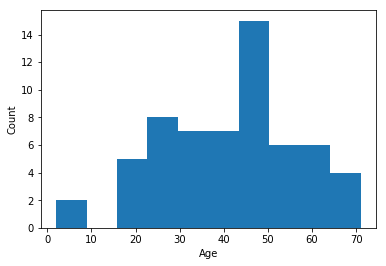

In [68]:
d = data.dropna()
plt.hist(d[d.Survived==0].Age)
plt.xlabel('Age')
plt.ylabel('Count');

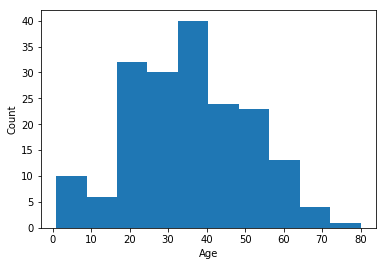

In [69]:
d = data.dropna()
plt.hist(d.Age)
plt.xlabel('Age')
plt.ylabel('Count');

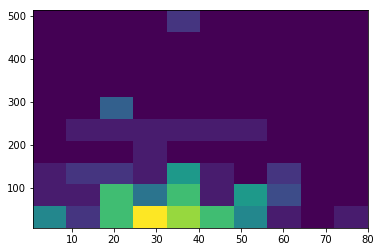

In [70]:
plt.hist2d(d[d.Survived==1].Age, d[d.Survived==1].Fare);

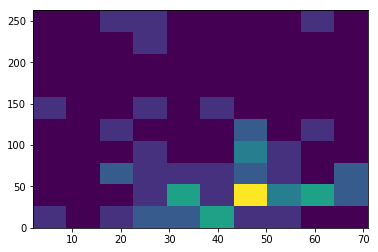

In [71]:
plt.hist2d(d[d.Survived==0].Age, d[d.Survived==0].Fare);

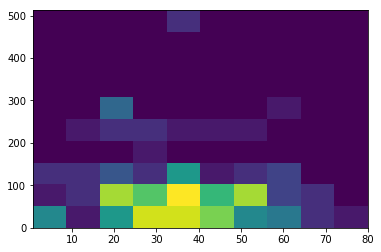

In [72]:
plt.hist2d(d.Age, d.Fare);

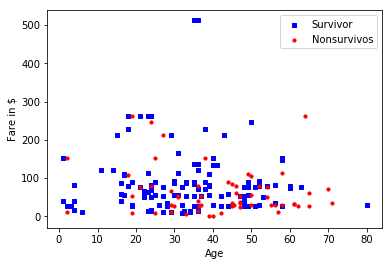

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(d[d.Survived==1].Age, d[d.Survived==1].Fare, s=10, c='b', marker="s", label='Survivor')
ax1.scatter(d[d.Survived==0].Age, d[d.Survived==0].Fare, s=10, c='r', marker="o", label='Nonsurvivos')
ax1.set_xlabel('Age')
ax1.set_ylabel('Fare in $')
plt.legend(loc='upper right');
plt.show()

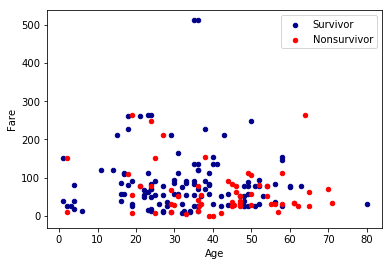

In [74]:
ax = d[d.Survived==1].plot(kind='scatter', x='Age', y='Fare', color='DarkBlue', label='Survivor');
d[d.Survived==0].plot(kind='scatter', x='Age', y='Fare', color='Red', label='Nonsurvivor', ax=ax);

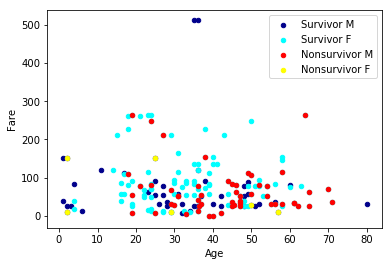

In [75]:
ax = d[d.Survived==1 & (d.Sex=="male")].plot(kind='scatter', x='Age', y='Fare', color='DarkBlue', label='Survivor M', s=20);
d[d.Survived==1 & (d.Sex=="female")].plot(kind='scatter', x='Age', y='Fare', color='Cyan', label='Survivor F', ax=ax);
d[(d.Survived==0) & (d.Sex=="male")].plot(kind='scatter', x='Age', y='Fare', color='Red', label='Nonsurvivor M', ax=ax);
d[(d.Survived==0) & (d.Sex=="female")].plot(kind='scatter', x='Age', y='Fare', color='Yellow', label='Nonsurvivor F', ax=ax);


### http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot